# PPL 

# Model interpretability via SHAP values

<br>
<hr>

<br>

<h1 style="color:red"> Index</h1>




## 0. Setup
## 1. Dataset Selection
## 2. Model Selection
## 3. Calculate SHAP values
## 4. Visualization
- ### 4.1 Explainability at a Local Level (specific project)
- ### 4.2 Explainability at a Global Level
- ### 4.3 Importance Ranking
- ### 4.4 Explainability between Features

<br>
<hr>
<br>
<br>

## 0. Setup

In [55]:
# set root folder (needed for imports)
import os
while not os.getcwd().endswith("ppl-model"):
    os.chdir("..")


# larger page width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# detect changes on folders
%load_ext autoreload
%autoreload 2

# ignore warning on jupyter
import warnings
warnings.filterwarnings('ignore')

# my imports
import settings
from src.modeling import util
from src.modeling.models import nnet
from dskc import dskc_terminal
from dskc import dskc_util

# third party imports
import pandas as pd
import numpy as np
import shap
import pickle

# see all rows of pandas dataframe
pd.set_option('display.max_rows', None) # option to see all rows
pd.set_option('display.max_columns', None)  # option to see all columns
pd.options.display.float_format = '{:,}'.format #to display floats with comma separators 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<br>

## 1. Dataset Selection

In [101]:
x_train, y_train, feature_names = util.read_train_data()
x_test, y_test, test_feature_names = util.read_test_data()
print(x_train.shape)
print(x_test.shape)
x_test_df = pd.DataFrame(x_test[:1000],columns=feature_names)

(97828, 74)
(22859, 74)
<class 'numpy.ndarray'>


<br> 

## 2. Model Selection

In [3]:
model = nnet.load_model()


tostring() is deprecated. Use tobytes() instead.
tostring() is deprecated. Use tobytes() instead.


<br>

## 3. Calculate SHAP values

### Set explainer

In [76]:
bg =  x_train[:20000]

# set explainer
print("\nCalculating shap explainer...") 
timer = dskc_util.Timer()
shap_explainer = shap.DeepExplainer(model,bg)
timer.end()

# save
with open('bg.pkl', 'wb') as f:
    pickle.dump(bg, f)
    
# explainer expected value
expected_value = shap_explainer.expected_value[0]



Calculating shap explainer...
Elapsed time: 0s


<br>

### Get SHAP values

In [77]:
# calc shap
print("\nCalculating shap values for test...") 
timer = dskc_util.Timer()
shap_values = shap_explainer.shap_values(x_test[:1000])
timer.end()



Calculating shap values for test...
Elapsed time: 17s


<br>

## 4. Visualization


The probabilty predicted by the model can be expressed with the following formula:

$$P(\textit{financed}) = \textit{base value} + \sum_{i=1}^{74} SHAP_{i}$$


A very intuive explanation can be found [here](https://medium.com/@gabrieltseng/interpreting-complex-models-with-shap-values-1c187db6ec83).


In [78]:
print("SHAP Base value", expected_value)

SHAP Base value 0.47499126


<br>

### 4.1 Explainability at a Local Level (specific project)

The explanation below shows for a **single entry** the contributing features to push the model output from the **base value** (the average model output over the training dataset we passed) towards one. **For this entry there are features pushing** the class label **up**, they are shown in red. And there also are features pushing the class label **down**, they are shown in blue.

In [79]:
# set project index
index = 10

# init the JS visualization code
shap.initjs()

# predticion value
predicted_value = model.predict(x_test)[index][0]
print("Predicted value:",predicted_value)

# plot the explanation of the first prediction
# Note the model is "multi-output" because it is rank-2 but only has one column
shap.force_plot(shap_explainer.expected_value[0], shap_values[0][index], feature_names)


Predicted value: 0.34589738


<br>

#### Detailed SHAP values (ascending order)

In [65]:
aux = pd.DataFrame(shap_values[0][index], index=feature_names, columns=['SHAP Values']).sort_values(by=['SHAP Values'], ascending=False)
aux

SHAP Values
percentage_days_elapsed                   0.20048938418771953
images                                    0.05152106453993358
title_length                             0.034135893008235496
start_month_cos                           0.03360471942572428
start_weekday                            0.029157402987968335
end_day                                  0.028736013799185924
country_reduced_others                   0.028661194335389883
start_day_sin                            0.028296474423443106
facebook                                  0.01774985918737948
cat_livros/revistas                      0.016854128924012186
days                                     0.016342074614271576
end_weekday                              0.015651442961286132
cat_turismo/viagens                      0.014047127619758248
cat_empreendedorismo                      0.01266154536055401
start_weekday_cos                        0.012323824065265674
cat_desporto                              0.00874043484320864
cat_ciência/tecnologia                   0.007504489275489323
target                                   0.007109815349807768
cat_educação                               0.0070219039385207
end_month_cos                            0.006592627188584231
title_prj_summary_topic_1                0.006265694261890324
cat_dança/cinema/teatro                  0.006141772129107267
cat_social                               0.004239061521366239
cat_alimentação/bebidas                  0.004134636587277055
cat_evento                               0.004013758538570255
reward_slot_4_amount                     0.003938439363640323
cat_agro-indústria                       0.003362797690927982
cat_zoófila                             0.0032900585144758224
cat_outros                               0.003264670271985233
channel                                  0.002910225549101233
days_elapsed                              0.00277480698219977
cat_jogos                               0.0020863795034587384
country_reduced_sao_tome_and_principe   0.0020849891892634333
n_rewards                               0.0016153640648500492
cat_vídeo/fotografia                    0.0014623471490340307
country_reduced_mozambique              0.0006511862766071317
cat_ambiente                            0.0006503403996233828
uncond_channel                         0.00023677672969643027
cat_cidadania_/_política               0.00018149649277329446
country_reduced_cabo_verde             3.1472575990483167e-05
percentage_target_self_funded           9.387342169244847e-07
amount_self_funded                    -3.8633321202827154e-05
cat_moda/design                        -7.781748084362335e-05
user_n_success_projects                -0.0003248397416092063
title_prj_summary_topic_3             -0.00036870925704125617
user_n_projects                       -0.00038320194198326635
end_weekday_sin                          -0.00055800675161173
reward_slot_1_amount                   -0.0006668281227043294
title_prj_summary_topic_5              -0.0010360811061920236
end_month                              -0.0017966438160203816
start_day_cos                          -0.0019986408403478806
title_prj_summary_topic_4               -0.002101555329732701
start_weekday_sin                       -0.002974303683328245
start_month                             -0.003340797347761688
reward_slot_5_amount                   -0.0037905131185489095
reward_slot_3_amount                   -0.0038390020367086684
backers                                -0.0045535215897966365
raised                                    -0.0046319160426062
reward_slot_2_amount                    -0.004932837234784802
end_weekday_cos                         -0.005060786646634797
title_prj_summary_topic_2               -0.005210670986992143
reward_slot_6_amount                    -0.005768642479015044
cat_música                              -0.005889113477850333
start_month_sin                         -0.007880857966925645
end_month_sin       

<br>

### 4.2 Explainability at a Global Level

In [80]:
# visualize the training set predictions
shap.force_plot(shap_explainer.expected_value, shap_values[0], x_test_df)

<br>

### 4.3 Importance Ranking

We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot.

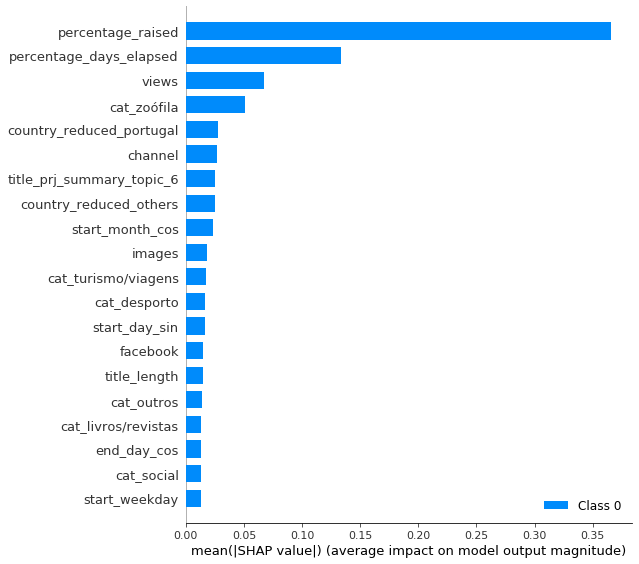

In [81]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_test_df)

<br>

### 4.4 Explainability between Features


To understand how a single feature affects the output of the model we can plot the SHAP value of that feature vs the value of the feature for all the examples in the dataset. Since SHAP values represent a feature's responsibility for a change in the model output, the plot below represents the change in `be financed probability` as feature changes. 

Vertical dispersion at a single level represents interaction effects with other features. To help reveal these interactions, we used a second feature for for coloring. 

<br>

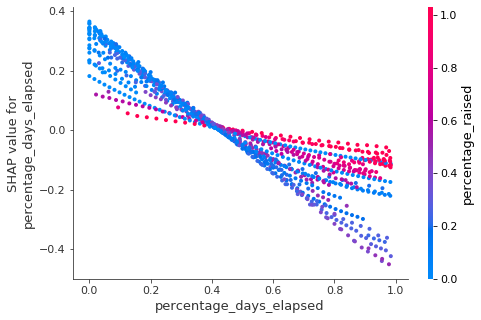

In [86]:
# select features
feature_1 = "percentage_days_elapsed"
feature_2 = "percentage_raised"

# plot
shap.dependence_plot(feature_1, shap_values[0], x_test_df[:1000],interaction_index =feature_2)

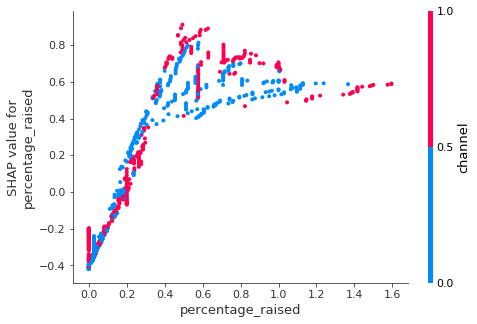

In [99]:
# select features
feature_1 = "percentage_raised"
feature_2 = "channel"

# plot
shap.dependence_plot(feature_1, shap_values[0], x_test_df[:1000],interaction_index =feature_2)